<a href="https://colab.research.google.com/github/Stocal723/Astronomy-project1/blob/main/calculating_the_Rotation_curve_of_Milky_Way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.units as u
import astropy.constants as ac

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def calculate_orbital_velocity(M, R):
  """
  Calculate the orbital velocity
  Input: M - mass, R = orbital radius
  Output: v - orbital velocity
  """
  v = np.sqrt(ac.G * M / R)
  return(v)

In [ ]:
M_bulge = 1e10 * u.solMass # Note the scientific notation here to define bulge mass

In [ ]:
R_arr = np.arange(1, 30) * u.kpc # Define a range of orbital radius in kilo parsec
v_arr = calculate_orbital_velocity(M_bulge, R_arr)
print(v_arr.to(u.km/u.s)) # When in doubt, print them out!
#

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


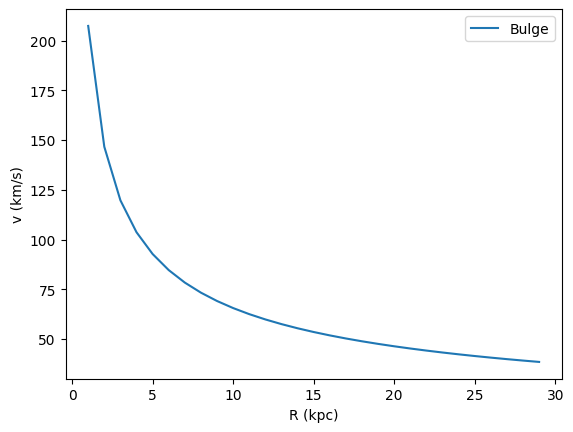

In [ ]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
# The combination of labels and legend will come handy to show differnt curves in a plot as shown in future figures.
plt.show()
#

In [57]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density *1.5
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density *1.5
    return(M)
def calculatingEnclosedMassForHalo(R, density=0.2387 * 1e6 * u.solMass/u.kpc**3):
    """
    Calculate enclosed mass for the halo component
    Input: R - orbital radius, density - density of the halo as calculated above
    Output: M - enclosed mass
    """
    if R < 100 * u.kpc:
        M = np.pi * 4/3 * (R**3) * density *6
    else:
        R = 100 * u.kpc # any radius larger than 100 kpc will be trucated at 100 kpc because of the extent of the halo component
        M = np.pi * 4/3 * (R**3) * density *6
    return(M)

Now I can show you that the enclosed mass for disk is different for 1kpc than for 5 kpc

In [61]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

1498.5396957623316 1e+06 solMass at 1 kpc
37463.492394058296 1e+06 solMass at 5 kpc


In [62]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, density_halo=0.2387 * 1e6 * u.solMass/u.kpc**3, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_halo = calculatingEnclosedMassForHalo(R, density=density_halo)
    M_total = M_disk + M_bulge + M_halo
    return(M_total)

In [63]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = calculate_orbital_velocity(M_bulge, R_arr)


In [64]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_halo = np.zeros(len(R_arr)) * u.solMass
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_arr)
v_halo_arr = calculate_orbital_velocity(M_halo, R_arr)
v_bulge_disk_halo_arr = calculate_orbital_velocity(M_total, R_arr)

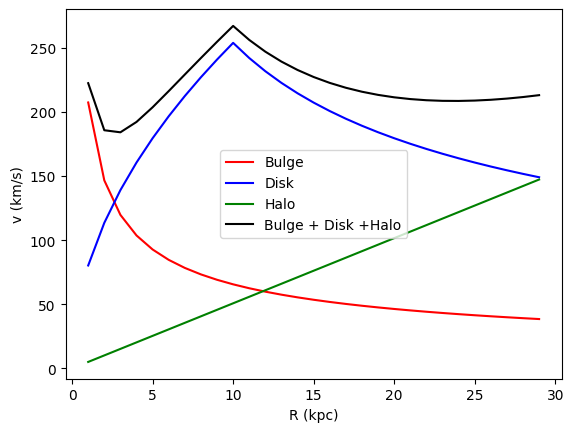

In [65]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo" ) # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk +Halo") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [54]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (2).txt


In [66]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

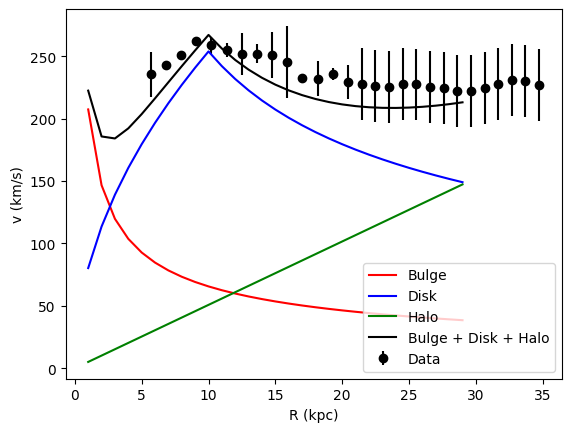

In [67]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo" ) # plotting halo
plt.plot(R_arr.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()